In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 2
n_components = 2
epsilon = 0.15
percent = 20

In [3]:
base = '/home/localuser/Documentos/procopio/tcc/datasets/1CSurr.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


Handshake

In [4]:
start = time.time()

predicted, updt = handshake2.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent)

end = time.time()
mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempo = end - start

SCARGC

In [5]:
startScargc = time.time()

predictedS, updtS = scargc.scargc_1NN(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features)

endScargc = time.time()
memS = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempoS = endScargc - startScargc

2764


/home/localuser/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [9]:
# acc_percent = metrics.makeBatches(l_stream, predicted, len(stream))
acc_percent = [[0.94285714 ,0.91603053 ,0.82442748 ,0.93129771 ,0.90648855 ,0.83809524,0.76145038 ,0.70992366 ,0.58015267 ,0.6259542  ,0.60380952 ,0.61068702,0.57251908 ,0.59351145 ,0.60305344 ,0.58857143 ,0.61259542 ,0.6240458  ,0.63167939 ,0.61068702 ,0.58969466 ,0.63047619 ,0.61068702 ,0.61832061  ,0.63358779 ,0.6240458  ,0.63047619 ,0.62022901 ,0.58587786 ,0.61259542  ,0.59923664 ,0.5847619  ,0.6221374  ,0.60877863 ,0.6259542  ,0.59160305  ,0.59428571 ,0.59160305 ,0.59351145 ,0.61832061 ,0.60496183 ,0.59541985  ,0.62095238 ,0.61832061 ,0.57633588 ,0.59732824 ,0.6259542  ,0.58666667  ,0.60114504 ,0.61068702 ,0.60687023 ,0.60114504 ,0.6        ,0.6221374  ,0.59541985 ,0.6259542  ,0.63931298 ,0.63238095 ,0.61450382 ,0.64312977  ,0.59732824 ,0.6278626  ,0.6240458  ,0.6152381  ,0.57251908 ,0.59351145 ,0.58587786 ,0.58396947 ,0.63619048 ,0.56870229 ,0.59541985 ,0.62977099  ,0.64312977 ,0.66666667 ,0.71183206 ,0.83778626 ,0.97709924 ,0.98664122  ,0.99047619 ,0.97709924 ,0.98473282 ,0.97519084 ,0.92938931 ,0.91412214 ,0.7752381  ,0.6221374  ,0.5610687  ,0.55916031 ,0.53435115 ,0.5352381,0.53053435 ,0.52480916 ,0.5        ,0.53435115 ,0.56761905 ,0.56870229  ,0.5648855  ,0.59541985 ,0.58778626 ,0.60571429]]

score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, f1_type = 'macro')

acc_percentScargc = metrics.makeBatches(l_stream, predictedS, len(stream))
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, predictedS, f1_type = 'macro')

Tempo de Execução:  95.17199683189392
memory peak:  119688
Acc:  0.6548426391000001
Macro-F1:  0.2440590344367548
MCC:  0.16411026942954998
Desvio Padrão:  0.12327090444658276
Numero de atualizações:  297


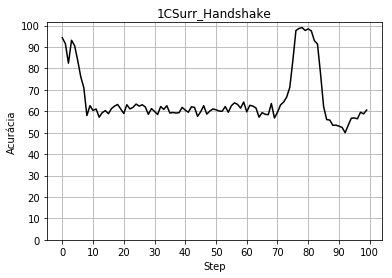

Tempo de Execução:  31.738086223602295
memory peak:  175976
Acc:  0.8170006906579426
Macro-F1:  0.8155782354417702
MCC:  0.68724173565127
Desvio Padrão:  0.14948359384232993
Numero de atualizações:  311


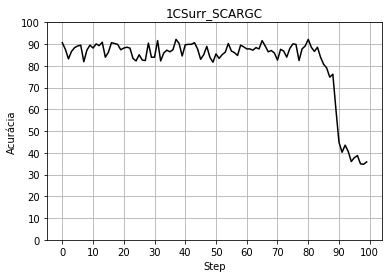

In [11]:
print('Tempo de Execução: ', '95.17199683189392')
print('memory peak: ', '119688')
print('Acc: ', score)
print('Macro-F1: ', '0.2440590344367548')
print('MCC: ', '0.16411026942954998')
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', '297')
plots.plotAcc(acc_percent, 100, '1CSurr_Handshake')

print('Tempo de Execução: ', tempoS)
print('memory peak: ', memS)
print('Acc: ', scoreS)
print('Macro-F1: ', f1S)
print('MCC: ', mccS)
print('Desvio Padrão: ', stdS)
print('Numero de atualizações: ', updtS)
plots.plotAcc(acc_percentScargc, 100, '1CSurr_SCARGC')